# Technical Challenge ! Custiomers and Orders - The lifeblood of any business!

This notebook depends on two data files: customers.scv and orders.csv. These files are hosted in the cloud (or Github), so for simplicity, we are providing you with the code to download and save the two files in a folder called 'sample_data' which lives within this notebook session (not on your local computer nor Google Drive).

![sample_data folder in notebook session](https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/images/sample_data_folder.png)

Please execute the first code snippet before moving to the rest of the exercise as this code will import the data from the files for you to be able to execute the rest of the exercise.

Remember as we said in the previous lecture, you have to save this notebook into your Google Drive by going to menu File/Save a Copy In Drive, or clicking in the button "Copy to Drive". This way, you will not lose any work you've done and the file will persist with your latest changes in your Google Drive. Also we recommend you to rename your .ipynb in your Google Drive, so you can easily find it in the future.

In [436]:
import requests

def import_data_files():
  r = requests.get('https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/customers.csv')
  with open('./sample_data/customers.csv', 'wb') as f:
    f.write(r.content)

  r = requests.get('https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/orders.csv')
  with open('./sample_data/orders.csv', 'wb') as f:
    f.write(r.content)

import_data_files()
print("Customers and orders CSV files have been added './sample_data'")

Customers and orders CSV files have been added './sample_data'


# Exercise 1: Processing Customers data (difficulty medium)

The sample customer data in 'customers.csv' file has just 5 columns: CustomerId, First Name, Last Name, City and State

![Data sample](https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/images/customers.png)

We strongly recommend that you complete from the [Prep Course: Intro to Python](https://colab.research.google.com/github/anyoneai/notebooks/blob/main/python3_crash_course.ipynb) the following section:
- Section 7: File I/O (to understand how to read CSV file)
- Section 6: For Loop (to navigate the contents of the CSV file)
- Section 5: Tuples, Lists, and Dictionaries (to manipulate the data of the CSV file)

With this, we hope you can complete this exercise successfully. Although if you want to solve this with libraries or any other way, you are welcome to do it your way.

*Hint:* We advise you to take a look at the data before you start.
**if you want to manually take a look at the data before you start, please see the content of the data [here](https://github.com/anyoneai/notebooks/blob/main/customers_and_orders/data/customers.csv).

*Hint*: There are many ways to do this exercise you can do your own, although here's some help. You can solve this exercise reading and parsing CSV files, structuring data into dictionaries, and using for loops to navigate the contents

*Hint*: Also, keep in mind that data might not be clean and you might have to figure out how to deal with that data from the code, without having to modify the data source.

Below are the 5 questions you'll have to answer to pass the evaluation:

**Question 1:** How many customers are in the file?
(as help, we have added some comments and starter code to help you structure the solution)

In [437]:
from os.path import exists
import csv
import pandas as pd
import matplotlib.pyplot as plt

# check if file can be found and open the file
datafile = "./sample_data/customers.csv"
if not exists(datafile):
  raise SystemExit("You should run the first code cell and download the dataset files!")

df_customers = pd.read_csv(datafile)
df_customers.head(5)
  # loop through the rows and count etc. THE REST IS UP TO YOU!

,CustomerID,FirstName,LastName,City,State
0,6192,Randi,Piedrahita,Canoga Park,CA
1,5100595,Christopher,Abraham,Loma Linda,CA
2,1902451,Elvis,Jauregui,Los Angeles,CA
3,1906377,Jose,Mota-Sanchez,Downey,CA
4,1902406,Scott,McCrorie,Long Beach,CA


In [438]:
df_customers.isnull().sum()

,0
CustomerID,0
FirstName,0
LastName,0
City,0
State,0


In [439]:
count = df_customers["CustomerID"].size
unique_customers = df_customers["CustomerID"].unique().size
print(f"The number of records in the file is: {count}, but the number of unique customers is: {unique_customers}")

The number of records in the file is: 602, but the number of unique customers is: 471


**Question 2:** In how many different states do the customers live in?

In [440]:
print(df_customers["State"].unique())
print(f"The number of different states in the file before data cleaning is: {df_customers["State"].unique().size}, however, CA, CA       , and Ca may refer to the same state (California)")

['CA' 'AZ' 'NV' 'FL' 'CA           ' 'WA' 'NH' 'ID' 'CO' 'Ca' 'TX' 'NM'
 'OR' 'UT' 'MA' 'IN']
The number of different states in the file before data cleaning is: 16, however, CA, CA       , and Ca may refer to the same state (California)


In [441]:
# Checking if "CA           " and "Ca" refer to California States ("CA")
df_filtered = df_customers[df_customers["State"].isin(["CA           ","Ca"])]
df_filtered

,CustomerID,FirstName,LastName,City,State
95,5053,Doe,Harris,Canoga Park,CA
97,5774,Mary,Scates Johnson,Monrovia,CA
113,5431,Jorge,Soto,Huntington Park,CA
203,1500569,Cecilio,Garcia,El Monte,Ca
231,5078,Barbara,Jannette,Camarillo,CA
260,5972,Paul,Freeman,Manhattan Beach,CA
338,4300928,Miguel,Osorio,San Bernardino,Ca


In [442]:
# Converting all california States to "CA"
df_customers["State"] = df_customers["State"].str.strip().str.upper()
df_customers

,CustomerID,FirstName,LastName,City,State
0,6192,Randi,Piedrahita,Canoga Park,CA
1,5100595,Christopher,Abraham,Loma Linda,CA
2,1902451,Elvis,Jauregui,Los Angeles,CA
3,1906377,Jose,Mota-Sanchez,Downey,CA
4,1902406,Scott,McCrorie,Long Beach,CA
...,...,...,...,...,...
597,5415365,Trinity,Hall Reif,Poway,CA
598,5415465,Kisona,Mialoto Jr.,Lynwood,CA
599,5415345,Lawrence,Zhang,Temple City,CA
600,5415481,John,Hughes,Round Top,TX


In [443]:
print(df_customers["State"].unique())
print(f"The number of different states in the file after this step of data cleaning is: {df_customers["State"].unique().size}")

['CA' 'AZ' 'NV' 'FL' 'WA' 'NH' 'ID' 'CO' 'TX' 'NM' 'OR' 'UT' 'MA' 'IN']
The number of different states in the file after this step of data cleaning is: 14


**Question 3** What is the state with most customers?

In [444]:
grouped = df_customers.groupby("State")["CustomerID"].nunique()
grouped

,CustomerID
State,
AZ,6
CA,455
CO,3
FL,3
ID,1
IN,1
MA,1
NH,1
NM,2


In [445]:
max_state = grouped.idxmax()
max_customers = grouped.max()

print(f"The California state '{max_state}' has the most unique customers: {max_customers}")

The California state 'CA' has the most unique customers: 455


**Question 4** What is the state with the least customers?

In [446]:
min_customers = grouped.min()
min_states = grouped[grouped == min_customers]


print(f"The states {min_states.index.tolist()} have the least unique customers: {min_customers}")

The states ['ID', 'IN', 'MA', 'NH', 'OR', 'UT', 'WA'] have the least unique customers: 1


**Question 5:** What is the most common last name?

In [447]:
max_lastname = df_customers["LastName"].value_counts().idxmax()
max_lastname_size = df_customers["LastName"].value_counts().size
print(f"The most common lastname is: {max_lastname} with {max_lastname_size} ocurrences")

The most common lastname is: Smith with 424 ocurrences


# Exercise 2: Processing Orders data (difficulty high)

The second sample files contains orders placed by customers from the first file. Be careful, this file has many rows and you most likely should not print the contents of the whole file.

The file contains the following columns: CustomerID, OrderID, Date, OrderTotal, ProductName, Price

![Data sample](https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/images/orders.png)

*Hint:* We advise you to take a look at the data before you start.
**if you want to manually take a look at the data before you start, please see the content of the data [here](https://raw.githubusercontent.com/anyoneai/notebooks/main/customers_and_orders/data/orders.csv).

*Hint*: There are many ways to do this exercise you can do your own, although here's some help. You can solve this exercise reading and parsing CSV files, structuring data into dictionaries, and using for loops to navigate the contents

*Hint*: Also, the data is not clean and you will have to figure out how to deal with that data from the code, without having to modify the data source.



**Question #1:** How many unique orders are in the orders.csv file?

**Question #2:** What is the average number of items per order (rounded to two decimal places)?

**Question #3:** What is the highest number of items per order?

**Question #4:** What is the number of orders placed in October 2021?

**Question #5:** Which customer spent the most amount of money in 2021?

**Question #6:** Historically, what is the best month for sales?

Once you get your answers, remember to go back to the course and introduce them in the multiple choice quiz

In [448]:
# check if file can be found and open the file
datafile2 = "./sample_data/orders.csv"
if not exists(datafile2):
  raise SystemExit("You should run the first code cell and download the dataset files!")

df_orders = pd.read_csv(datafile2)
df_orders.head(5)


,CustomerID,OrderID,Date,OrderTotal,ProductName,Price
0,8091,7742581,2021-07-26 14:40:10.783,95.0,Z03,90.0
1,902139,7742778,2021-08-08 05:01:21.120,60.0,0844 A/C,60.0
2,2300266,7742593,2021-07-27 11:00:16.020,185.0,M07,90.0
3,2300266,7742593,2021-07-27 11:00:16.020,185.0,M09,90.0
4,5173013,7742609,2021-07-28 14:26:13.930,165.0,0324,160.0


In [449]:
# Data cleaning
df_orders.info()
df_orders.describe(include="all")
df_orders.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29294 entries, 0 to 29293
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   29294 non-null  int64  
 1   OrderID      29294 non-null  int64  
 2   Date         27152 non-null  object 
 3   OrderTotal   29294 non-null  float64
 4   ProductName  29294 non-null  object 
 5   Price        29294 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ MB


,0
CustomerID,0
OrderID,0
Date,2142
OrderTotal,0
ProductName,0
Price,0


In [450]:
# Making sure Date is date Dtype
df_orders["Date"] = pd.to_datetime(df_orders["Date"], errors="coerce")

In [451]:
df_orders.describe(include="all")

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price
count,2.929400e+04,2.929400e+04,27152,29294.000000,29294,29294.000000
unique,NaN,NaN,NaN,NaN,1647,NaN
top,NaN,NaN,NaN,NaN,Vendor ID Card,NaN
freq,NaN,NaN,NaN,NaN,1067,NaN
mean,1.131998e+06,5.600482e+06,2016-06-01 04:28:56.910751488,298.039223,NaN,95.549703
min,5.014000e+03,5.038000e+03,2005-10-09 16:16:22.013000,0.000000,NaN,0.000000
25%,5.768000e+03,4.223440e+06,2013-05-12 12:19:39.138500096,115.000000,NaN,70.000000
50%,1.098600e+04,6.600940e+06,2016-12-01 16:44:08.952999936,190.000000,NaN,90.000000
75%,1.903426e+06,7.552230e+06,2019-06-10 20:38:23.883249920,285.000000,NaN,110.000000
max,5.415503e+06,7.791850e+06,2022-02-09 12:01:54.493000,3600.000000,NaN,600.000000


In [452]:
df_null_dates = df_orders[df_orders["Date"].isnull()]
print(df_null_dates.shape)
df_null_dates

(2142, 6)


,CustomerID,OrderID,Date,OrderTotal,ProductName,Price
8375,5014,5365,NaT,120.0,211,60.0
8376,5014,5365,NaT,120.0,212,60.0
8377,5068,5329,NaT,120.0,601,60.0
8378,5068,5329,NaT,120.0,601,60.0
8379,5014,5058,NaT,120.0,211,60.0
...,...,...,...,...,...,...
22578,7901,38905,NaT,80.0,3451,80.0
22717,7901,37858,NaT,80.0,3451,80.0
22734,5446,35426,NaT,60.0,3122,60.0
22735,5946,35497,NaT,130.0,PP46,60.0


We have 1578 rows with missing dates, we will keep them

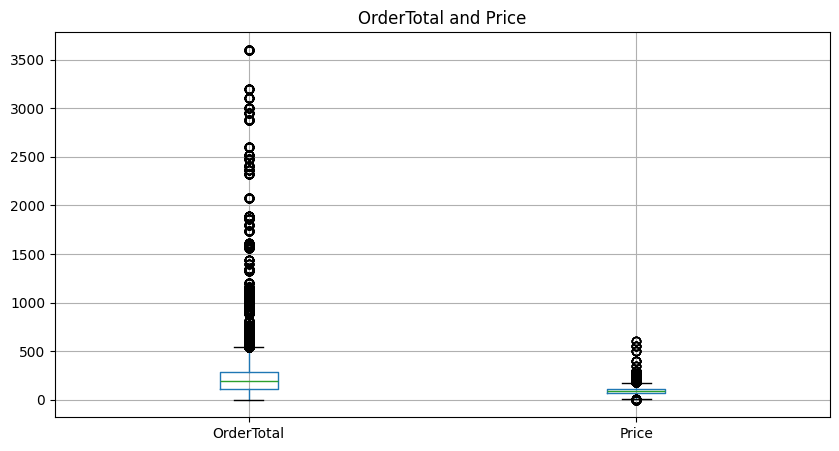

In [453]:
plt.figure(figsize=(10,5))
df_orders[["OrderTotal", "Price"]].boxplot()
plt.title("OrderTotal and Price")
plt.show()

In [454]:
# OrderTotal is concentrated around 500, Price around 100~150, and Ordertotal does have very high outliers, we will retrieve these items

high_orders = df_orders[df_orders["OrderTotal"] > 3000]
print(high_orders)


       CustomerID  OrderID                    Date  OrderTotal ProductName  \
2168         5464  7553706 2019-06-09 07:28:33.873      3600.0        0901   
2169         5464  7553706 2019-06-09 07:28:33.873      3600.0        0901   
2170         5464  7553706 2019-06-09 07:28:33.873      3600.0        0901   
2171         5464  7553706 2019-06-09 07:28:33.873      3600.0        0901   
2172         5464  7553706 2019-06-09 07:28:33.873      3600.0        0901   
...           ...      ...                     ...         ...         ...   
27124        5464  7005266 2017-07-09 12:38:11.793      3200.0        3370   
27125        5464  7005266 2017-07-09 12:38:11.793      3200.0        3371   
27126        5464  7005266 2017-07-09 12:38:11.793      3200.0        3371   
27127        5464  7005266 2017-07-09 12:38:11.793      3200.0        3371   
27128        5464  7005266 2017-07-09 12:38:11.793      3200.0        3371   

       Price  
2168   100.0  
2169   100.0  
2170   100.0  
217

In [455]:
# At a first glance i don't see anything suspicious about these outliers, we will keep them

# Question #1: How many unique orders are in the orders.csv file?

In [456]:
unique_orders = df_orders["OrderID"].nunique()
print(f"Count of unique orders: {unique_orders}")

Count of unique orders: 16672


# Question #2: What is the average number of items per order (rounded to two decimal places)?

In [457]:
# We will count how many items we have per OrderID, and then calculate the mean rounded to 2 decimal places
items_per_order = df_orders.groupby("OrderID").size()
avg_items = round(items_per_order.mean(), 2)

print(f"Average items per order: {avg_items}")


df_orders_no_duplicates = df_orders.drop_duplicates()
items_per_order_no_duplicates = df_orders_no_duplicates.groupby("OrderID").size()
avg_items_no_duplicates = round(items_per_order_no_duplicates.mean(), 2)

print(f"Average items per order(no duplicates): {avg_items_no_duplicates}")


Average items per order: 1.76
Average items per order(no duplicates): 1.4


# Question #3: What is the highest number of items per order?

In [458]:
max_items = items_per_order.max()
print(f"Highest number of items per order: {max_items}")

max_items_no_duplicates = items_per_order_no_duplicates.max()
print(f"Highest number of items per order(no duplicates): {max_items_no_duplicates}")

Highest number of items per order: 35
Highest number of items per order(no duplicates): 9


# Question #4: What is the number of orders placed in October 2021?

In [459]:
# We need to filter October 2021 and then count the unique orders
october_orders = df_orders[
    (df_orders["Date"].dt.year == 2021) &
    (df_orders["Date"].dt.month == 10)
]
num_october_orders = october_orders["OrderID"].nunique()

print(f"Number of orders in October 2021: {num_october_orders}")

Number of orders in October 2021: 267


# Question #5: Which customer spent the most amount of money in 2021?

In [460]:
# We will group our orders by CustomerID, and then find the highest spending one in 2021
y2021_orders = df_orders[
    (df_orders["Date"].dt.year == 2021)
]
y2021_orders = y2021_orders.drop_duplicates('OrderID')

customer_spending = y2021_orders.groupby("CustomerID")["OrderTotal"].sum()

top_customer = customer_spending.idxmax()
max_spent = customer_spending.max()

customer_name = df_customers.loc[df_customers['CustomerID'] == top_customer].iloc[0]

print(f"Customer who spent the most in 2021:{customer_name["FirstName"]} {customer_name["LastName"]}, with {max_spent} spent.")

Customer who spent the most in 2021:Brandon Divas, with 7755.0 spent.


In [461]:
max_orders = df_orders.loc[(df_orders['CustomerID'] == top_customer) & (df_orders["Date"].dt.year == 2021)].drop_duplicates(subset="OrderID")
max_orders

,CustomerID,OrderID,Date,OrderTotal,ProductName,Price
1406,5172443,7694774,2021-03-23 12:35:53.483,485.0,0116,250.0
4340,5172443,7741602,2021-06-28 14:46:22.897,710.0,0983,225.0
4574,5172443,7742654,2021-07-30 17:04:39.080,935.0,1922,225.0
7749,5172443,7694893,2021-04-05 14:22:51.813,250.0,0113,250.0
8063,5172443,7695807,2021-05-05 10:56:15.877,735.0,0110,250.0
8130,5172443,7740599,2021-05-21 16:57:25.000,700.0,0983,225.0
8892,5172443,7743529,2021-08-20 16:39:42.690,1125.0,0983,225.0
9288,5172443,7788604,2021-10-01 12:57:56.307,935.0,1920,225.0
10231,5172443,7789483,2021-10-28 10:43:26.493,235.0,0913,225.0
10232,5172443,7789484,2021-10-28 10:47:38.840,710.0,1920,225.0


In [462]:
print(max_orders['OrderTotal'].sum())

7755.0


This result is strange, as 7750 is not present in the possible answers to question #5, i will choose the closest one, and the highest one:

Option A:

Brandon Divas, CustomerId: 5172443 has spent 7675.0

Since Option C:

Sophie Labonte, CustomerId: 1909369 has spent 27560.0 doesn't actually have orders in 2021.

# Question #6: Historically, what is the best month for sales?

In [467]:
# Drop duplicates explicitly for orderIDs, since an Order can appear multiple times for every product, and we don't want to sum the same order multiple times
df_orders_unique = df_orders.drop_duplicates(subset="OrderID")[["OrderID", "Date", "OrderTotal"]]
monthly_sales = df_orders_unique.groupby(df_orders_unique["Date"].dt.month)["OrderTotal"].sum()
best_month = monthly_sales.idxmax()
best_sales = monthly_sales.max()

print(f"The best month for sales is {best_month}(January) with {best_sales} sales")

The best month for sales is 1.0(January) with 292908.0 sales


<Axes: title={'center': 'Sales per Month'}, xlabel='Date'>

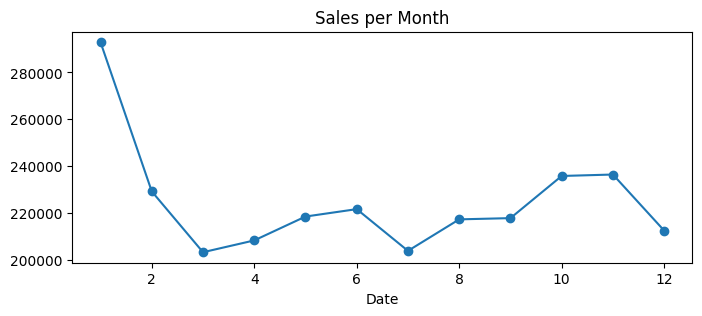

In [473]:
monthly_sales.plot(kind="line", figsize=(8,3), marker="o", title="Sales per Month")

There is a clear difference between January sales and the rest of the year, we will cut the outliers and cap at 90th percentile (just an exercise)

<Axes: title={'center': 'Sales per Month'}, xlabel='Date'>

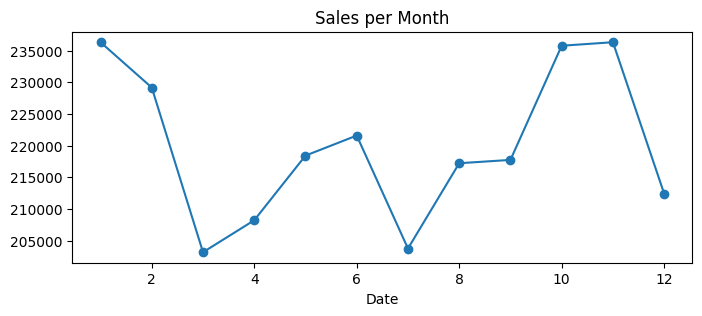

In [483]:
threshold = monthly_sales.quantile(0.90)
monthly_sales_clipped = monthly_sales.clip(upper=threshold)
monthly_sales_clipped.plot(kind="line", figsize=(8,3), marker="o", title="Sales per Month")

# Finished!

Hope this was not too difficult and slicing and dicing the datasets was some fun. Now head on back to the course and provide the answers to the questions from this exercise.